<a href="https://colab.research.google.com/github/karencheung369/YoutubeSpamClassifier/blob/main/YoutubeSpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<center><h1><b>Youtube Spam Classifier</b></h1></center>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing CSV file I/O
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
Psy = pd.read_csv('/content/drive/My Drive/data/Youtube01-Psy.csv')
Katy = pd.read_csv('/content/drive/My Drive/data/Youtube02-KatyPerry.csv')
# combine the csv files to a single dataframe
df = pd.concat([Psy, Katy])
# remove stop words
def remove_stop_words(comments):
    return [word for word in ' '.join(comments).lower().split()
    if word not in (stopwords.words('english') + [",", ".", " ", "2"])]
spam = df[df["CLASS"] == 1]["CONTENT"]
ham = df[df["CLASS"] == 0]["CONTENT"]
spam_list = remove_stop_words(spam)
ham_list = remove_stop_words(ham)

print("Spam comments top 10 most common words")
print(pd.Series(spam_list).value_counts()[:10])
print("Ham comments top 10 most common words")
print(pd.Series(ham_list).value_counts()[:10])

Spam comments top 10 most common words
please       87
check        82
subscribe    64
﻿            56
like         48
channel      46
new          29
hey          28
videos       26
guys         26
dtype: int64
Ham comments top 10 most common words
video      52
katy       49
song       44
﻿          38
views      37
billion    36
love       32
like       31
perry      30
people     23
dtype: int64


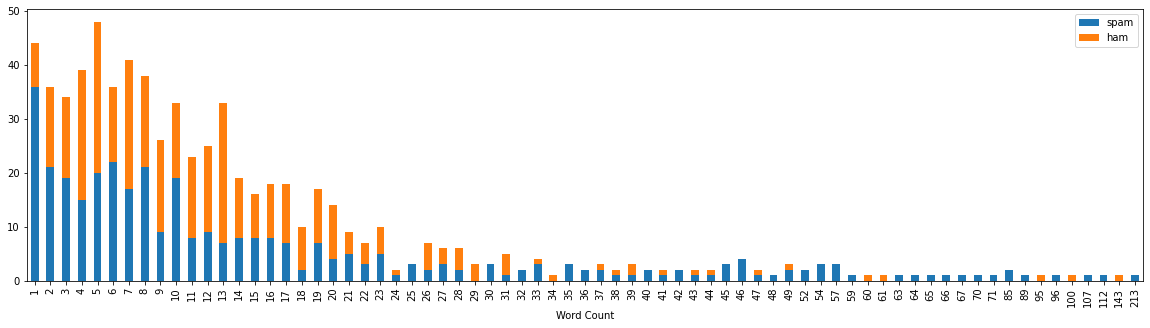

In [ ]:
dfspam_wordcount = df[df["CLASS"] == 1]["wordCounts"].value_counts()
dfham_wordcount = df[df["CLASS"] == 0]["wordCounts"].value_counts()

dfcombined = pd.DataFrame({'spam': dfspam_wordcount, 'ham': dfham_wordcount})
dfcombined.plot.bar(figsize=(20, 5), stacked=True, xlabel="Word Count")

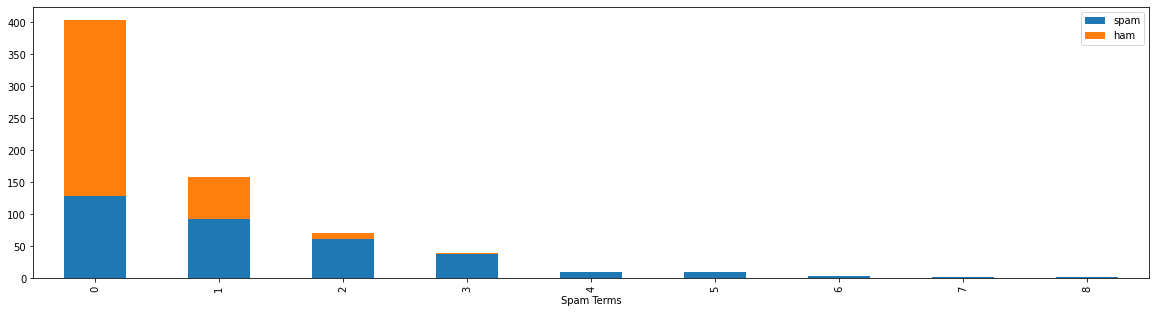

In [ ]:
dfspam_terms = df[df["CLASS"] == 1]["spamTerms"].value_counts()
dfham_terms = df[df["CLASS"] == 0]["spamTerms"].value_counts()

dfcombined = pd.DataFrame({'spam': dfspam_terms, 'ham': dfham_terms})
dfcombined.plot.bar(figsize=(20, 5), stacked=True, xlabel="Spam Terms")

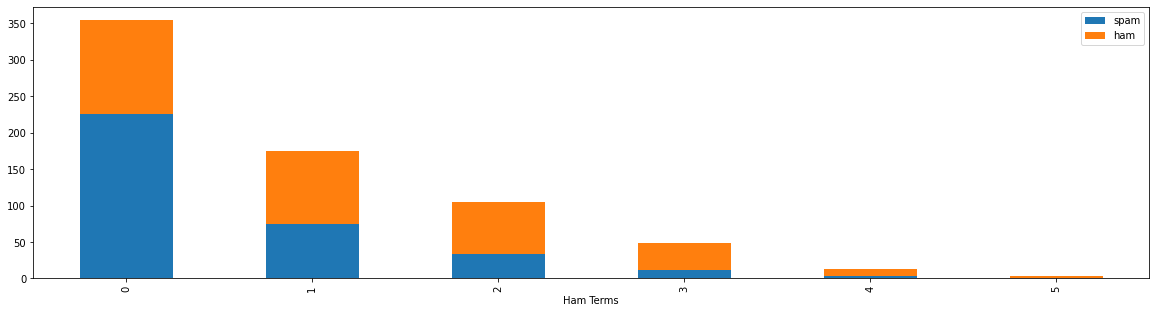

In [ ]:
dfspam_terms = df[df["CLASS"] == 1]["hamTerms"].value_counts()
dfham_terms = df[df["CLASS"] == 0]["hamTerms"].value_counts()

dfcombined = pd.DataFrame({'spam': dfspam_terms, 'ham': dfham_terms})
dfcombined.plot.bar(figsize=(20, 5), stacked=True, xlabel="Ham Terms")

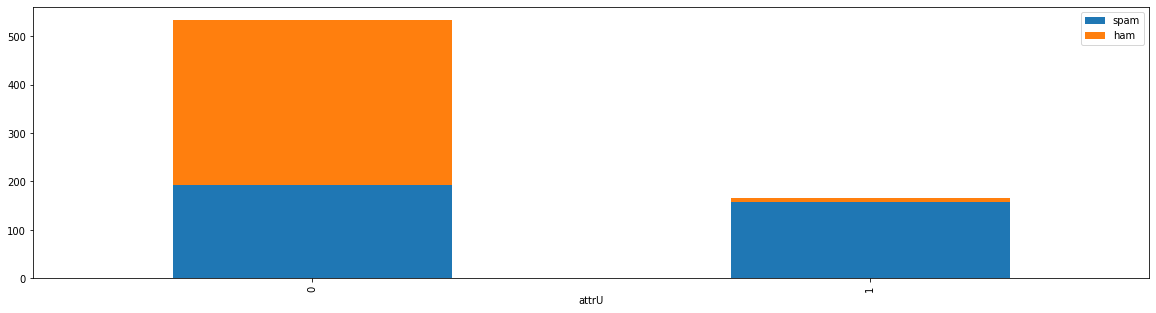

In [ ]:
dfspam_attr = df[df["CLASS"] == 1]["attrU"].value_counts()
dfham_attr = df[df["CLASS"] == 0]["attrU"].value_counts()

dfcombined = pd.DataFrame({'spam': dfspam_attr, 'ham': dfham_attr})
dfcombined.plot.bar(figsize=(20, 5), stacked=True, xlabel="attrU")

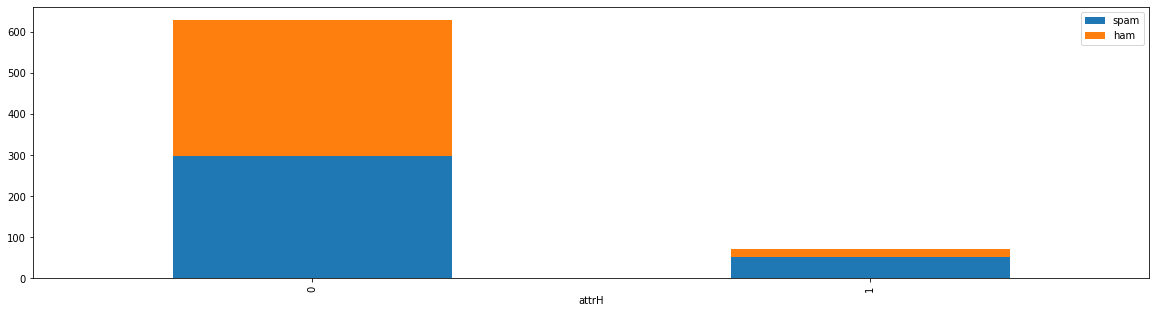

In [ ]:
dfspam_attr = df[df["CLASS"] == 1]["attrH"].value_counts()
dfham_attr = df[df["CLASS"] == 0]["attrH"].value_counts()

dfcombined = pd.DataFrame({'spam': dfspam_attr, 'ham': dfham_attr})
dfcombined.plot.bar(figsize=(20, 5), stacked=True, xlabel="attrH")

In [ ]:
Psy = pd.read_csv('/content/drive/My Drive/data/Youtube01-Psy.csv')
Katy = pd.read_csv('/content/drive/My Drive/data/Youtube02-KatyPerry.csv')
# combine the csv files to a single dataframe
df = pd.concat([Psy, Katy])
# drop out several features unnecessary columns by df.drop(['column_nameA', 'column_nameB'], axis=1)
clean_df = df.drop(['COMMENT_ID', 'AUTHOR', 'DATE', 'attrL', 'spamTerms',	'hamTerms', 'wordCounts'], axis=1)
# print first 5 records
clean_df.head()

,CONTENT,CLASS,attrU,attrH,spamTermsNorm,hamTermsNorm,wordCountsNorm
0,"Huh, anyway check out this you[tube] channel: ...",1,0,0,0.250,0.0,0.0330
1,Hey guys check out my new channel and our firs...,1,0,0,1.000,0.2,0.1368
2,just for test I have to say murdev.com,1,0,0,0.000,0.0,0.0330
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,0,0,0.125,0.0,0.0472
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,0,0,0.125,0.0,0.0189


In [ ]:
# check the length of the dataset
len(df)

700

In [ ]:
# details of the dataset; contains “content” and “class” only
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 349
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CONTENT         700 non-null    object 
 1   CLASS           700 non-null    int64  
 2   attrU           700 non-null    int64  
 3   attrH           700 non-null    int64  
 4   spamTermsNorm   700 non-null    float64
 5   hamTermsNorm    700 non-null    float64
 6   wordCountsNorm  700 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 43.8+ KB


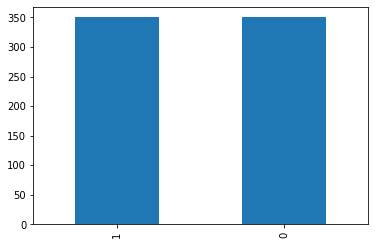

In [ ]:
# plotting the number of class counts
clean_df['CLASS'].value_counts().plot(kind='bar')

In [ ]:
# define the features and class labels
X = clean_df.drop(columns=["CLASS","CONTENT"])
y = clean_df.CLASS
# number of rows and columns
print(X.shape)
print(y.shape)

(700, 5)
(700,)


In [ ]:
# features from original data frame 
features = ['spamTermsNorm', 'hamTermsNorm', 'wordCountsNorm', 'attrU', 'attrH']
X_features = X[features]

In [ ]:
print(X_features)

     spamTermsNorm  hamTermsNorm  wordCountsNorm  attrU  attrH
0            0.250           0.0          0.0330      0      0
1            1.000           0.2          0.1368      0      0
2            0.000           0.0          0.0330      0      0
3            0.125           0.0          0.0472      0      0
4            0.125           0.0          0.0189      0      0
..             ...           ...             ...    ...    ...
345          0.000           0.2          0.0991      0      0
346          0.000           0.0          0.0000      0      1
347          0.250           0.8          0.7568      0      0
348          0.000           0.4          0.2973      0      0
349          0.000           0.4          0.1081      0      0

[700 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split
# split the data into training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X_features, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(490, 5)
(210, 5)
(490,)
(210,)


In [ ]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
new_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,new_predictions)

array([[108,   5],
       [ 15,  82]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


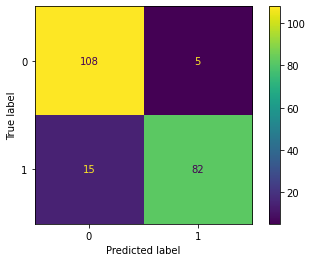

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test,new_predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       113
           1       0.94      0.85      0.89        97

    accuracy                           0.90       210
   macro avg       0.91      0.90      0.90       210
weighted avg       0.91      0.90      0.90       210



<center><h1><b>Logistic Regression</b></h1></center>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# dictionary of the parameters to tune and pass as an argument in GridSearchCV
parameters = {
    "random_state": [42],
    "C": [0.2, 0.5, 1.0], # regulisation parameter
    "class_weight": [None, "balanced"], # weighting to apply in calculation of the negative log likelihood when fitting the model
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [50, 80, 100, 200, 500, 800, 1000],
}
# estimator: estimator object
# params_grid: dictionary object with hyperparameters u wanna try
# cv: number of cross-validation to try for each selected set of hyperparameters
# verbose: details print out while fit data to GridSearchCV
gridSearch = GridSearchCV(LogisticRegression(), parameters, cv=5, verbose=True) 
gridSearch.fit(X_train, y_train)

print("Best parameters from GridSearchCV:", gridSearch.best_params_)
print("Logistic regresion accuracy:", round(gridSearch.score(X_test, y_test) * 100.0, 0), "%")

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best parameters from GridSearchCV: {'C': 1.0, 'class_weight': None, 'max_iter': 50, 'random_state': 42, 'solver': 'liblinear'}
Logistic regresion accuracy: 90.0 %


In [ ]:
from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
logistic_regression = LogisticRegression(C = 1.0, class_weight = None, max_iter = 50, random_state = 42, solver = 'liblinear')
logistic_regression.fit(X_train, y_train)

print("Logistic regression model accuracy:", round(logistic_regression.score(X_test, y_test) * 100.0, 3) , "%")
print("F1 score", f1_score(logistic_regression.predict(X_test), y_test, average=None))

Logistic regression model accuracy: 90.476 %
F1 score [0.91525424 0.89130435]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


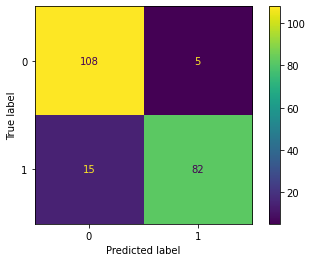

In [ ]:
plot_confusion_matrix(logistic_regression, X_test, y_test)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores_lr = cross_val_score(logistic_regression, X, y, cv=50)
print("50-fold cross validation average score for Logistic regression model: ", round(np.mean(cross_val_scores_lr) * 100.0, 3), "%")

50-fold cross validation average score for Logistic regression model:  86.0 %


<center><h1><b>Evaluate Model with Eminem.csv</b></h1></center>

In [ ]:
eminem_df = pd.read_csv('/content/drive/My Drive/data/Youtube04-Eminem.csv')
eminem_spam = eminem_df[eminem_df["CLASS"] == 1]["CONTENT"]
eminem_ham = eminem_df[eminem_df["CLASS"] == 0]["CONTENT"]
eminem_spam_list = remove_stop_words(eminem_spam)
eminem_ham_list = remove_stop_words(eminem_ham)

print("Spam comments top 10 most common words")
print(pd.Series(eminem_spam_list).value_counts()[:10])
print("Ham comments top 10 most common words")
print(pd.Series(eminem_ham_list).value_counts()[:10])

Spam comments top 10 most common words
check        207
please        64
video         61
like          58
subscribe     52
guys          50
!             40
i&#39;m       37
make          36
channel       35
dtype: int64
Ham comments top 10 most common words
love      36
song      30
eminem    22
like      18
megan     14
best      13
﻿         12
way       11
song﻿     10
/><br      9
dtype: int64


In [ ]:
eminem_df = pd.read_csv('/content/drive/My Drive/data/Youtube04-Eminem.csv')
# drop out several features unnecessary columns by df.drop(['column_nameA', 'column_nameB'], axis=1)
eminem_clean_df = eminem_df.drop(['COMMENT_ID', 'AUTHOR', 'DATE', 'attrL', 'spamTerms',	'hamTerms', 'wordCounts'], axis=1)
# print first 5 records
eminem_clean_df.head()

,CONTENT,CLASS,attrU,attrH,spamTermsNorm,hamTermsNorm,wordCountsNorm
0,+447935454150 lovely girl talk to me xxx﻿,1,0,0,0.0,0.2,0.0536
1,I always end up coming back to this song<br />﻿,0,0,0,0.0,0.6,0.0804
2,"my sister just received over 6,500 new <a rel=...",1,1,0,0.0,0.0,0.1964
3,Cool﻿,0,0,0,0.0,0.0,0.0000
4,Hello I&#39;am from Palastine﻿,1,0,1,0.0,0.0,0.0268


In [ ]:
# define the features and labels for the CountVectorizer
eminem_X = eminem_clean_df.drop(columns=["CLASS","CONTENT"])
# X = clean_df.CONTENT
eminem_y = eminem_clean_df.CLASS
# number of rows and columns
print(eminem_X.shape)
print(eminem_y.shape)

(448, 5)
(448,)


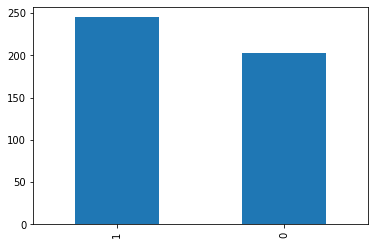

In [ ]:
# plotting the number of class counts
eminem_clean_df['CLASS'].value_counts().plot(kind='bar')

In [ ]:
# features from original data frame 
eminem_features = ['spamTermsNorm', 'hamTermsNorm', 'wordCountsNorm', 'attrU', 'attrH']
eminem_X_features = X[eminem_features]
print(eminem_X_features)

     spamTermsNorm  hamTermsNorm  wordCountsNorm  attrU  attrH
0           0.0000           0.2          0.0536      0      0
1           0.0000           0.6          0.0804      0      0
2           0.0000           0.0          0.1964      1      0
3           0.0000           0.0          0.0000      0      0
4           0.0000           0.0          0.0268      0      1
..             ...           ...             ...    ...    ...
443         0.5714           0.0          0.0536      0      0
444         0.5714           0.0          0.1161      0      0
445         0.2857           0.2          0.8304      0      0
446         0.0000           0.0          0.0625      0      1
447         0.1429           0.0          0.0268      0      0

[448 rows x 5 columns]


In [ ]:
print("Logistic regression model accuracy:", round(logistic_regression.score(eminem_X_features, eminem_y) * 100.0, 3) , "%")
print("F1 score", f1_score(logistic_regression.predict(eminem_X_features), eminem_y, average=None))

Logistic regression model accuracy: 91.071 %
F1 score [0.90243902 0.91769547]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


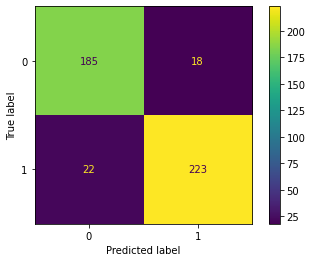

In [ ]:
plot_confusion_matrix(logistic_regression, eminem_X_features, eminem_y)
plt.show()